In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
new= pd.read_csv( 'Diwali_sales.csv', encoding= 'unicode_escape')

In [3]:
new.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
one_hot_encoded_data = pd.get_dummies(new.columns==['State', 'Zone','Occupation','Product_Category','Product_ID','Cust_name']) 
print(one_hot_encoded_data)

ValueError: ('Shapes must match', (15,), (6,))

In [5]:
new.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [6]:
type(new)

pandas.core.frame.DataFrame

In [7]:
new.shape

(11251, 15)

In [8]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
new.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [10]:
pd.isnull(new)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
new.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
new.dropna(inplace=True)

In [13]:
new['Amount'] = new['Amount'].astype('int')

In [14]:
new['Amount'].dtypes

dtype('int32')

In [15]:
new.duplicated().sum()

8

In [16]:
new.drop_duplicates(inplace=True)

In [17]:
new.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
new.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
new[['Age', 'Orders', 'Amount']].describe()


,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084676
std,12.756116,1.114880,5221.728074
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


In [20]:
new.rename(lambda col : col.lower().strip().replace(' ', '_'), axis='columns', inplace=True)

In [21]:
new['user_id']=new['user_id'].astype('str')

In [22]:
new['marital_status']=new['marital_status'].astype('str')

In [23]:
new['orders']=new['orders'].astype('str')

In [24]:
print("Updated columns :-\n")
new.dtypes

Updated columns :-



user_id             object
cust_name           object
product_id          object
gender              object
age_group           object
age                  int64
marital_status      object
state               object
zone                object
occupation          object
product_category    object
orders              object
amount               int32
dtype: object

In [25]:
new['product_id'].nunique()

2350

In [26]:
new['product_id'].value_counts()

P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
             ..
P00257642     1
P00078242     1
P00333542     1
P00206642     1
P00296942     1
Name: product_id, Length: 2350, dtype: int64

<Axes: xlabel='product_id', ylabel='count'>

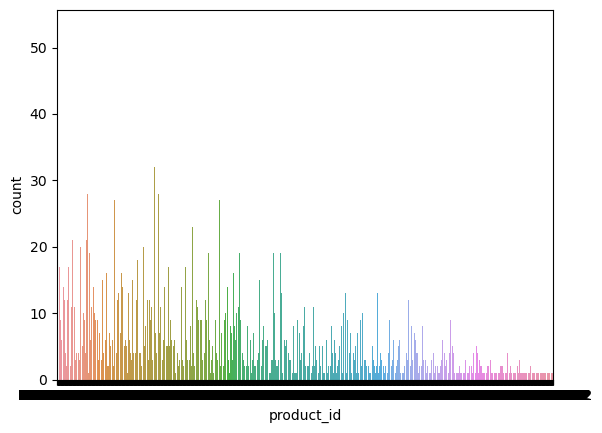

In [27]:
sns.countplot(data=new, x='product_id')

In [28]:
new['gender'].nunique()

2

In [29]:
new['gender'].value_counts()

F    7828
M    3403
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

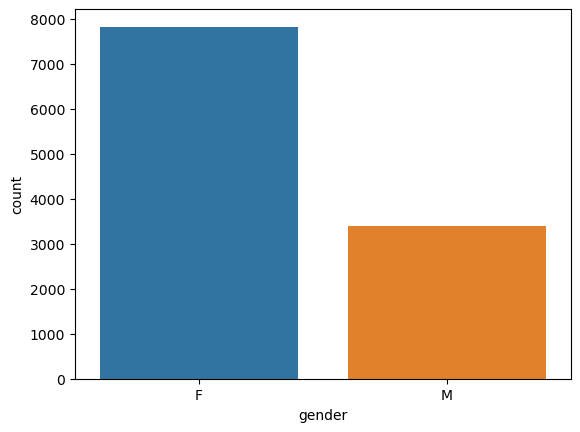

In [30]:
sns.countplot(data=new, x='gender')

In [31]:
new['age_group'].nunique()

7

In [32]:
new['age_group'].value_counts()

26-35    4536
36-45    2282
18-25    1878
46-50     983
51-55     829
55+       427
0-17      296
Name: age_group, dtype: int64

<Axes: xlabel='age_group', ylabel='count'>

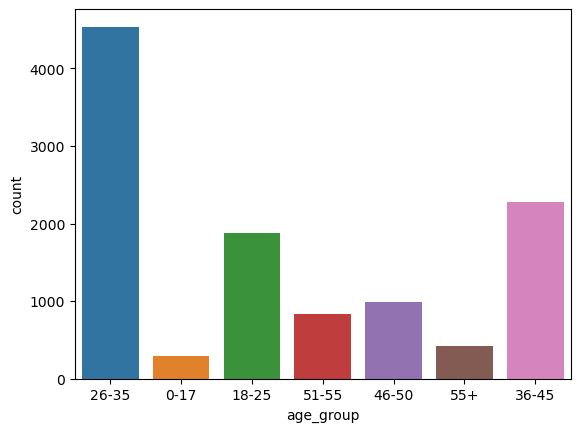

In [33]:
sns.countplot(data=new, x='age_group')

In [34]:
new['zone'].nunique()

5

In [35]:
new['zone'].value_counts()

Central     4287
Southern    2693
Western     1948
Northern    1490
Eastern      813
Name: zone, dtype: int64

<Axes: xlabel='zone', ylabel='count'>

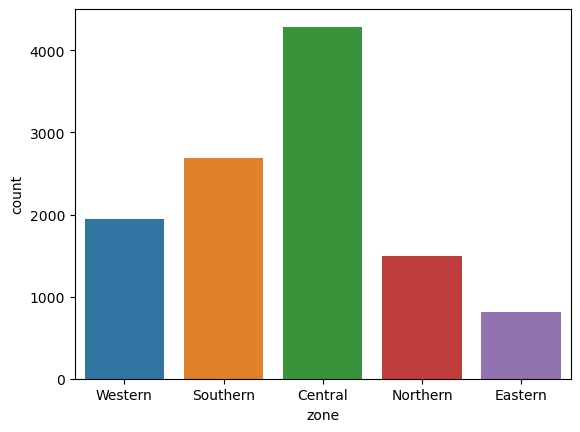

In [36]:
sns.countplot(data=new, x='zone')

In [37]:
new['marital_status'].nunique()

2

In [38]:
new['marital_status'].value_counts()

0    6514
1    4717
Name: marital_status, dtype: int64

<Axes: xlabel='marital_status', ylabel='count'>

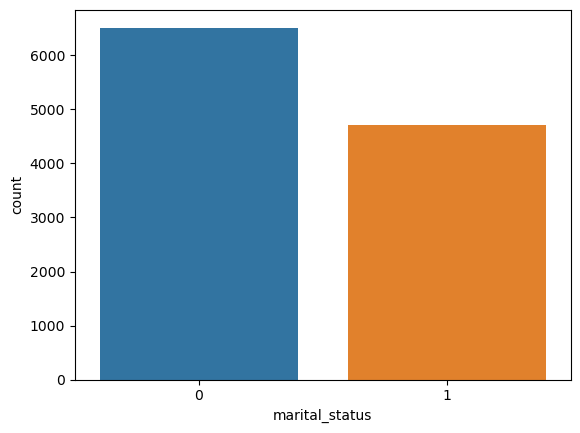

In [39]:
sns.countplot(data=new, x='marital_status')

In [40]:
new['state'].nunique()

16

In [41]:
new['state'].value_counts()

Uttar Pradesh       1942
Maharashtra         1522
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              451
Bihar                433
Gujarat              426
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: state, dtype: int64

<Axes: xlabel='state', ylabel='count'>

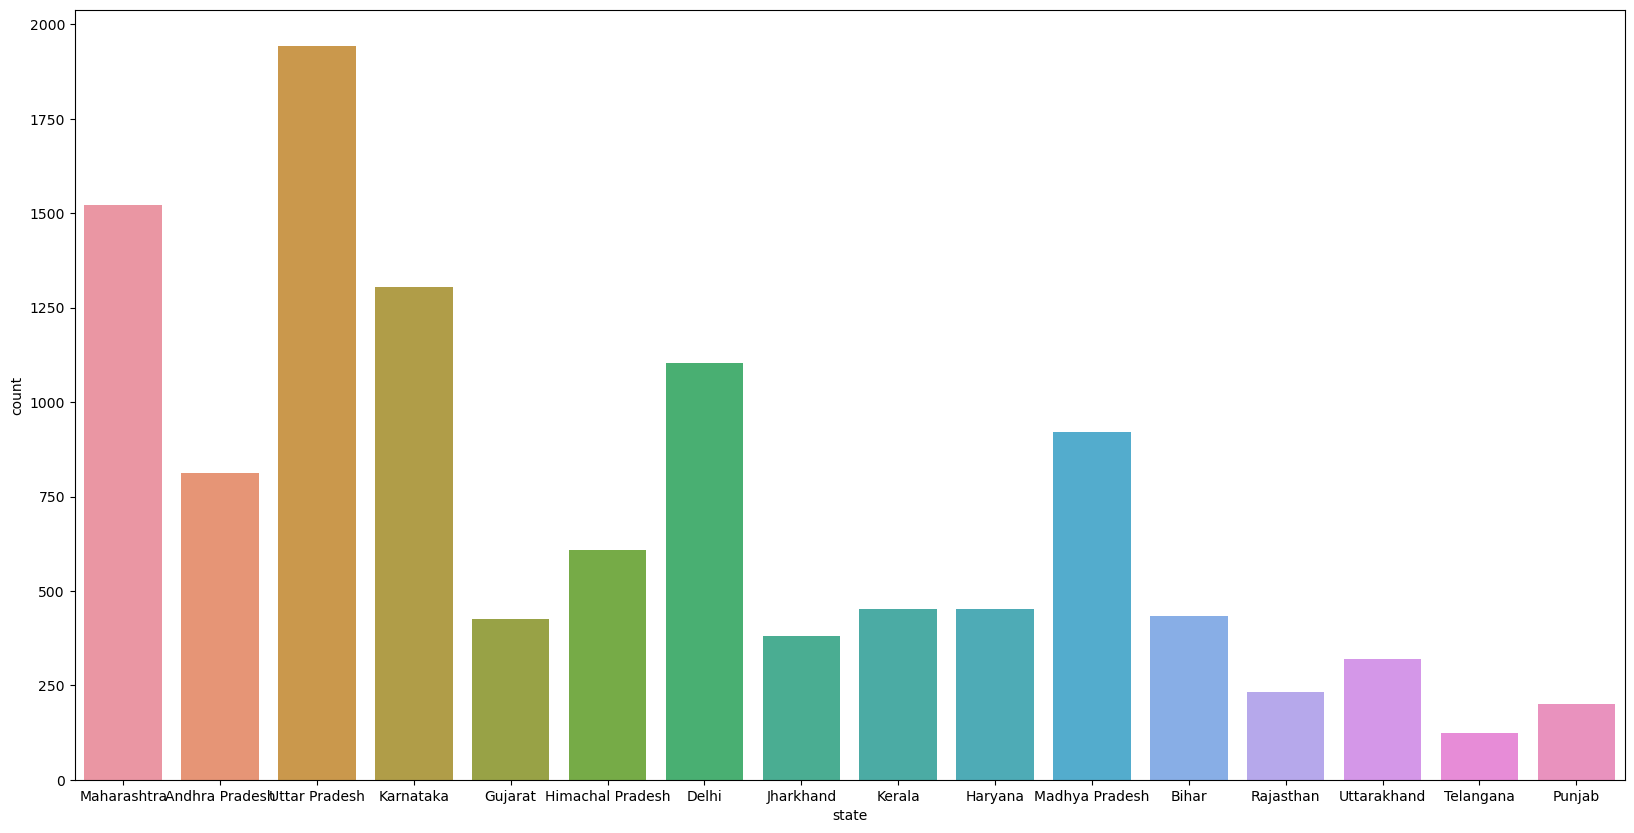

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(data=new,x='state')

In [43]:
new['occupation'].nunique()

15

In [44]:
new['occupation'].value_counts()

IT Sector          1581
Healthcare         1408
Aviation           1309
Banking            1137
Govt                854
Hospitality         700
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             349
Agriculture         282
Name: occupation, dtype: int64

<Axes: xlabel='occupation', ylabel='count'>

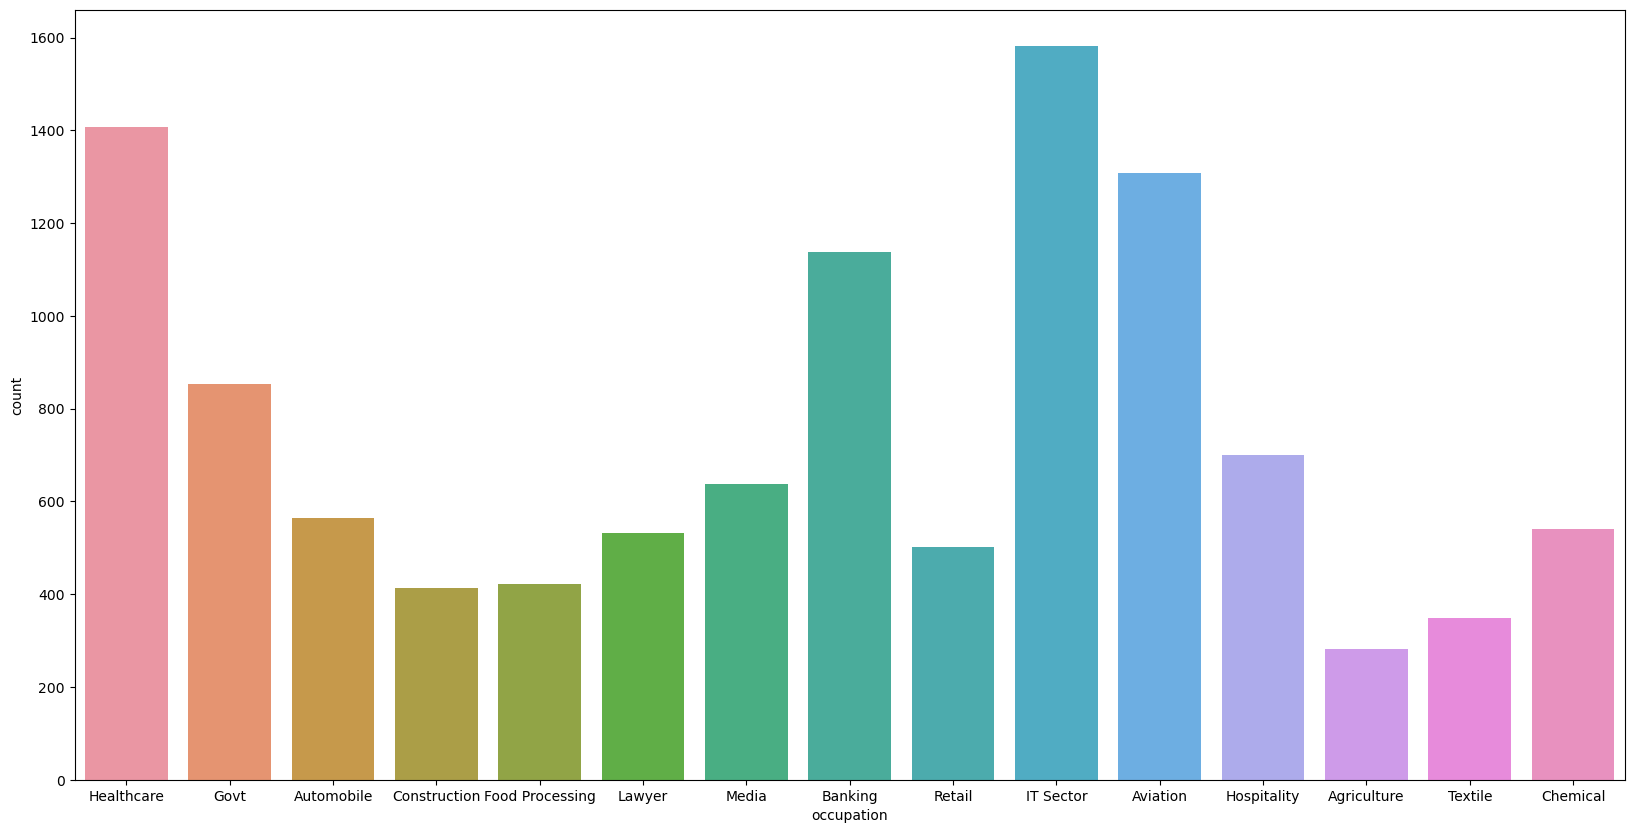

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(data=new,x='occupation')

In [46]:
new['orders'].nunique()

4

In [47]:
new['orders'].value_counts()

2    2893
1    2807
4    2769
3    2762
Name: orders, dtype: int64

<Axes: xlabel='orders', ylabel='count'>

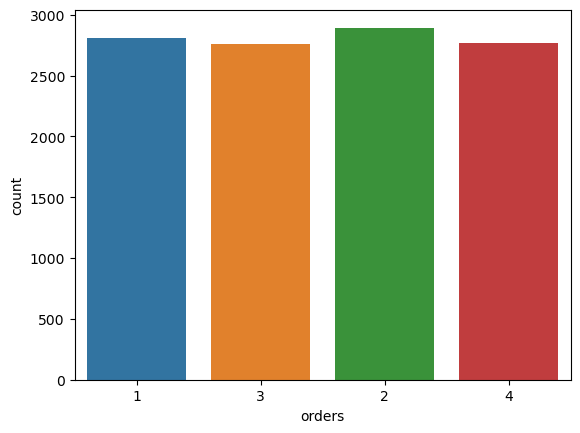

In [48]:
sns.countplot(data=new,x='orders')

In [49]:
new['product_category'].nunique()

18

In [50]:
new['product_category'].value_counts()

Clothing & Apparel       2653
Food                     2490
Electronics & Gadgets    2082
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Decor                      96
Auto                       96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: product_category, dtype: int64

<Axes: xlabel='product_category', ylabel='count'>

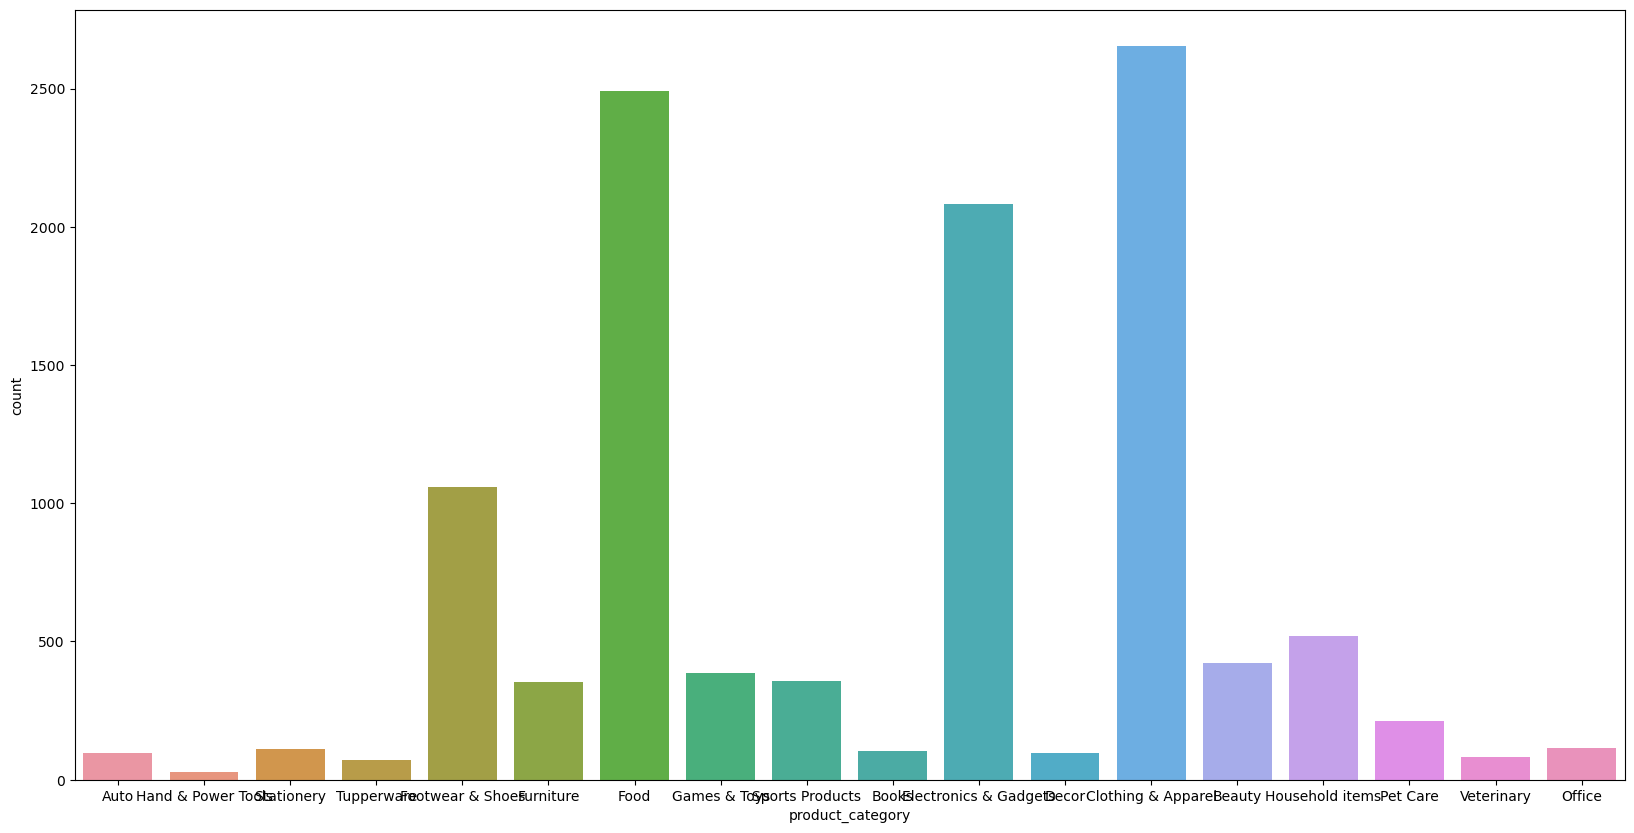

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(data=new,x='product_category')

In [52]:
new['amount'].nunique()

6583

In [53]:
new['amount'].value_counts()

7907     11
7956     10
7086      9
6923      8
7856      8
         ..
12078     1
12079     1
12082     1
12083     1
188       1
Name: amount, Length: 6583, dtype: int64

In [54]:
statusvsgender= new.groupby(['marital_status', 'gender'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
statusvsgender

,marital_status,gender,amount
0,0,F,43778558
2,1,F,30529121
1,0,M,18320176
3,1,M,13550970


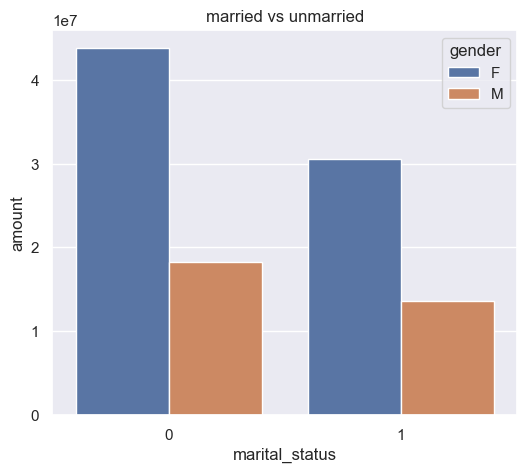

In [58]:
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = statusvsgender, x = 'marital_status',y= 'amount', hue='gender')
plt.title("married vs unmarried")
plt.show()

In [56]:
new.head()

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
